# Đầu mục phân tích

<a href='#setup'>Setup</a>

<a href='#section1'>Section 1 - Data Exploration</a>

<a href='#1'>1. Customer Dataset</a>

<a href='#2'>2. Geolocation Dataset</a>

<a href='#3'>3. Order Dataset</a>

<a href='#4'>4. Order Item Dataset</a></a>

<a href='#5'>5. Order Payment Dataset</a>

<a href='#6'>6. Order Reviews Dataset</a>

<a href='#7'>7. Products Dataset</a>

<a href='#8'>8. Sellers Dataset</a>

<a href='#9'>9. Product Category Nam Translation Dataset</a>

<a href='#section2'>Section 2 - Business Acumen</a>

<a href='#sales'>1. Sales</a>

<a href='#price'>2. Prices</a>

<a href='#payment'>3. Payment</a>

<a href='#categories'>4. Categories</a>

<a href='#freight'>5. Freight</a>

<a href='#processing'>6. Processing</a>


# <a id='setup'> Setup </a>

In [1]:
#cài đặt các thư viện cần sử dụng
!pip install jovian opendatasets plotly wordcloud folium matplotlib seaborn --upgrade --q

In [2]:
#import thư viện đã cài
import jovian
import os
import pandas as pd 
from wordcloud import WordCloud
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster, HeatMap
import numpy as np

In [3]:
#đọc dữ liệu từ thư mục local
data_folder_location = 'C:\\Users\\Admin\\Desktop\\1MG-test\\brazilian_ecommerce'
data = dict()
for file in os.listdir(data_folder_location):
    if file.endswith(".csv"):
        data[file.replace(".csv","")] = pd.read_csv(os.path.join(data_folder_location, file))

In [4]:
#gán dataframe cho mỗi tệp dữ liệu tương ứng
olist_customers_dataset = data['olist_customers_dataset']
olist_geolocation_dataset = data['olist_geolocation_dataset']
olist_orders_dataset = data['olist_orders_dataset']
olist_order_items_dataset = data['olist_order_items_dataset']
olist_order_payments_dataset = data['olist_order_payments_dataset']
olist_order_reviews_dataset = data['olist_order_reviews_dataset']
olist_products_dataset = data['olist_products_dataset']
olist_sellers_dataset = data['olist_sellers_dataset']
product_category_name_translation = data['product_category_name_translation']

# <a id='section1'>Section 1 - Data Exploration</a>

## <a id='1'>1. Customer Dataset</a>

###   **<i>Description<i>**

In [513]:
#dataset
olist_customers_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [514]:
#data types
olist_customers_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [515]:
#dataset shape
olist_customers_dataset_shape = olist_customers_dataset.shape
print('Số bản ghi -', olist_customers_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_customers_dataset_shape[1])

Số bản ghi - 99441 

Số trường dữ liệu - 5


Tập dữ liệu có **99441 bản ghi**, mỗi bản ghi bao gồm **5 trường dữ liệu**:
- **customer_id**: id khách hàng (theo đơn hàng)	
- **customer_unique_id**: id định danh khách hàng 
- **customer_zip_code_prefix**: mã zip code 	
- **customer_city**: tên thành phố
- **customer_state**: tên bang 

Chứa thông tin về khách hàng và vị trí của họ. Thông tin này được sử dụng để xác định danh tính khách hàng trong đơn đặt hàng và địa điểm giao hàng. Mỗi đơn đặt hàng khác nhau sẽ tương ứng với id khách hàng khác nhau, có nghĩa cùng một khách hàng với nhiều đơn đặt hàng sẽ có nhiều id khác nhau tương ứng theo các đơn đặt hàng của họ. Do vậy, trường customer_unique_id được sử dụng để xác định những khách hàng đã quay lại mua hàng. 

### <i>Data Cleaning<i> 

In [516]:
#Kiểm tra dữ liệu null
olist_customers_dataset.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Kết quả**: Không có điểm dữ liệu nào bị trống

In [517]:
#Kiểm tra trùng lặp dữ liệu theo trường customer_id
olist_customers_dataset_duplicate = olist_customers_dataset[olist_customers_dataset.duplicated('customer_id')]
print('Những bản ghi trùng lặp dữ liệu theo trường customer_id:')
olist_customers_dataset_duplicate

Những bản ghi trùng lặp dữ liệu theo trường customer_id:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


**Kết quả:** Dựa theo trường customer_id, không có bản ghi trùng lặp dữ liệu

### <i>Data Exploring<i> 

In [5]:
#top 10 thành phố có nhiều khách hàng nhất
top_city = olist_customers_dataset.groupby(['customer_city']).count().reset_index().sort_values(['customer_unique_id'], ascending=False)
top_city = top_city.head(10)
top_city

,customer_city,customer_id,customer_unique_id,customer_zip_code_prefix,customer_state
3597,sao paulo,15540,15540,15540,15540
3155,rio de janeiro,6882,6882,6882,6882
453,belo horizonte,2773,2773,2773,2773
558,brasilia,2131,2131,2131,2131
1143,curitiba,1521,1521,1521,1521
707,campinas,1444,1444,1444,1444
2964,porto alegre,1379,1379,1379,1379
3247,salvador,1245,1245,1245,1245
1529,guarulhos,1189,1189,1189,1189
3428,sao bernardo do campo,938,938,938,938


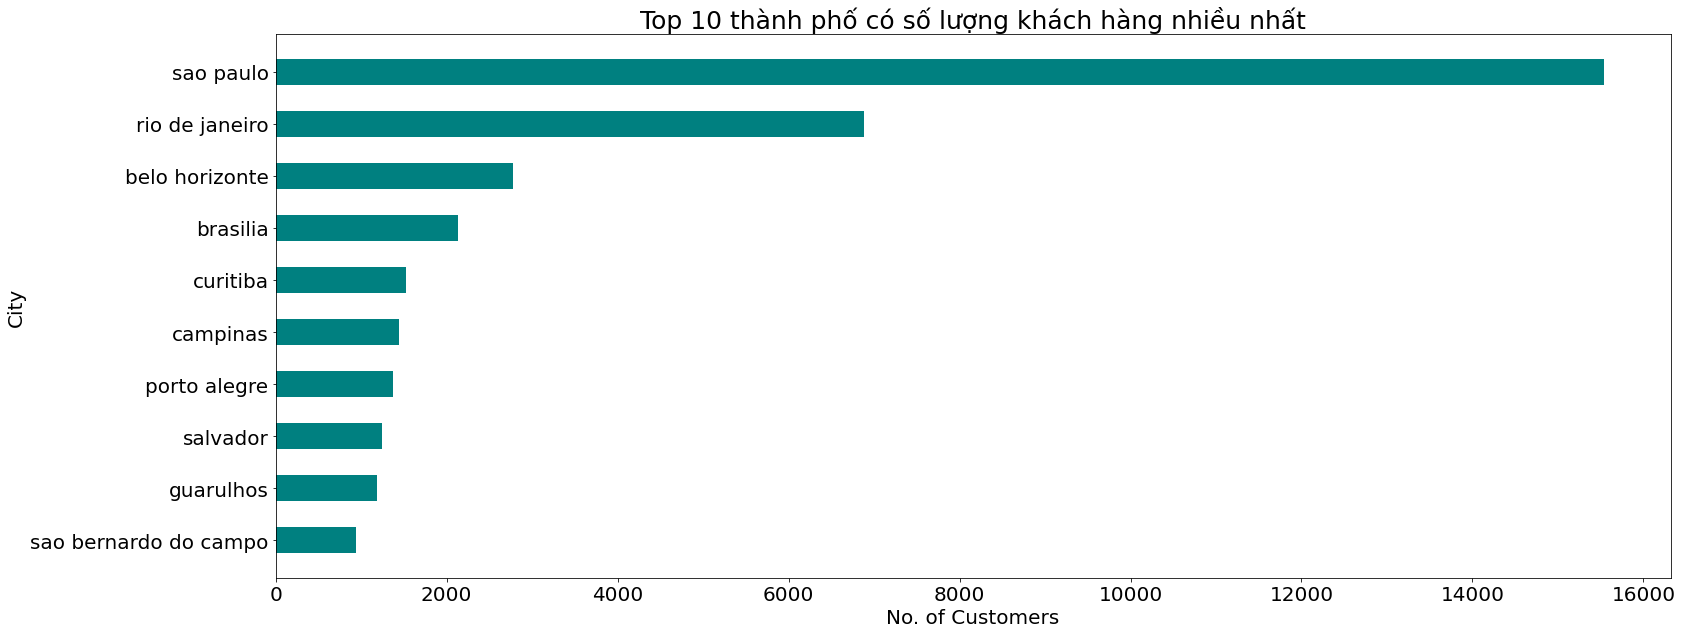

In [519]:
x_city = np.array(top_city['customer_city'])
y_city = np.array(top_city['customer_unique_id'])

plt.figure(figsize=(25,10)) 
plt.barh(x_city,y_city, height = 0.5, color = 'teal')
plt.title(label = "Top 10 thành phố có số lượng khách hàng nhiều nhất", fontsize=25)
plt.xlabel('No. of Customers', fontsize=20)
plt.ylabel('City', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.gca().invert_yaxis()

plt.show()

In [6]:
#top 10 bang có nhiều khách hàng nhất
top_state = olist_customers_dataset.groupby(['customer_state']).count().reset_index().sort_values(['customer_unique_id'], ascending=False)
top_state = top_state.head(10)
top_state

,customer_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city
25,SP,41746,41746,41746,41746
18,RJ,12852,12852,12852,12852
10,MG,11635,11635,11635,11635
22,RS,5466,5466,5466,5466
17,PR,5045,5045,5045,5045
23,SC,3637,3637,3637,3637
4,BA,3380,3380,3380,3380
6,DF,2140,2140,2140,2140
7,ES,2033,2033,2033,2033
8,GO,2020,2020,2020,2020


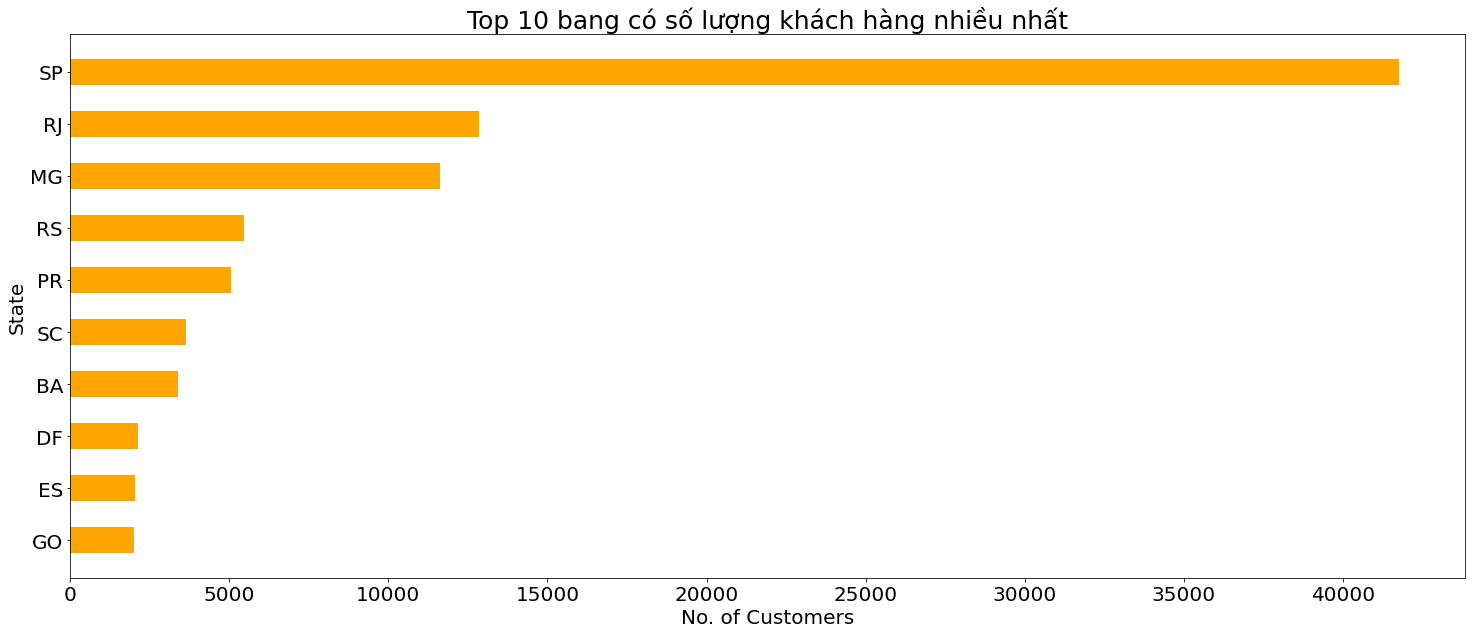

In [7]:
x_state = np.array(top_state['customer_state'])
y_state = np.array(top_state['customer_unique_id'])

plt.figure(figsize=(25,10)) 
plt.barh(x_state,y_state, height = 0.5, color = 'orange')
plt.title(label = "Top 10 bang có số lượng khách hàng nhiều nhất", fontsize=25)
plt.xlabel('No. of Customers', fontsize=20)
plt.ylabel('State', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.gca().invert_yaxis()

plt.show()

## <a id='2'>2. Geolocation Dataset</a>

### <i>**Description**<i>

In [522]:
#dataset
olist_geolocation_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


In [523]:
#data types
olist_geolocation_dataset.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [524]:
#data shape
olist_geolocation_dataset_shape = olist_geolocation_dataset.shape
print('Số bản ghi -', olist_geolocation_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_geolocation_dataset_shape[1])

Số bản ghi - 1000163 

Số trường dữ liệu - 5


Tập dữ liệu có **1000163 bản ghi**, mỗi bản ghi có **5 trường dữ liệu**: 
- **geolocation_zip_code_prefix**: mã zipcode 
- **geolocation_lat**: vĩ độ
- **geolocation_lng**: kinh độ
- **geolocation_city**: tên thành phố
- **geolocation_state**: tên bang

Các vị trí trên bản đồ được xác định bởi kinh độ và vĩ độ. Thông tin này được sử dụng để tính khoảng cách từ người bán tới người mua.

### <i>Data Cleaning<i> 

In [525]:
#kiểm tra dữ liệu null
olist_geolocation_dataset.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Kết quả**: Không có điểm dữ liệu nào bị trống

In [526]:
#kiểm tra trùng lặp dữ liệu theo trường geolocation_lat & geolocation_lng
a = olist_geolocation_dataset.duplicated(subset=['geolocation_lat','geolocation_lng'])
a.value_counts()

False    718463
True     281700
dtype: int64

**Kết quả**: Xét theo cả trường **<i>geolocation_lat & geolocation_lng<i>**, có **<i>281700<i>** bản ghi trùng dữ liệu 

In [8]:
#in bản ghi trùng lặp dữ liệu
olist_geolocation_dataset_duplicate = olist_geolocation_dataset[olist_geolocation_dataset.duplicated(subset=['geolocation_lat','geolocation_lng'])]
olist_geolocation_dataset_duplicate

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [9]:
#loại bỏ bản ghi trùng lặp dữ liệu
olist_geolocation_dataset.drop_duplicates(subset=['geolocation_lat','geolocation_lng'], inplace=True)

In [529]:
#kiểm tra trùng lặp dữ liệu lại một lần nữa sau khi thực hiện loại bỏ 
olist_geolocation_dataset_duplicate = olist_geolocation_dataset[olist_geolocation_dataset.duplicated(subset=['geolocation_lat','geolocation_lng'])]
olist_geolocation_dataset_duplicate

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


**=> Note**: Đã loại bỏ tất cả trùng lặp dữ liệu

In [10]:
#thay thế tên são paulo thành sao paulo
olist_geolocation_dataset.replace(to_replace='são paulo', value='sao paulo', inplace=True)
olist_geolocation_dataset.geolocation_city.value_counts()

sao paulo              91580
rio de janeiro         35075
belo horizonte         19444
curitiba               11235
porto alegre            8667
                       ...  
pilõezinhos                1
são bernardino             1
novo sobradinho            1
nilo pecanha               1
bentópolis de minas        1
Name: geolocation_city, Length: 7960, dtype: int64

In [531]:
#mô tả tệp dữ liệu thông qua thống kê các trường dữ liệu 
olist_geolocation_dataset[['geolocation_lat','geolocation_lng']].describe(include='all')

,geolocation_lat,geolocation_lng
count,718463.000000,718463.000000
mean,-20.976851,-46.453572
std,5.916889,4.419821
min,-36.605374,-101.466766
25%,-23.601977,-48.913363
50%,-22.862112,-46.645820
75%,-19.916685,-43.788552
max,45.065933,121.105394


### <i>Data Exploring<i> 

In [11]:
#danh sách thành phố có nhiều khách hàng nhất 
list_city = top_city['customer_city']

In [12]:
#thông tin vị trí của các khách hàng thuộc danh sách những thành phố trên
geo_data = olist_geolocation_dataset[~olist_geolocation_dataset['geolocation_city'].isin(list_city)]
geo_data[:3]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
50999,3203,-23.216648,-46.861371,jundiaí,SP
71908,4004,-23.574798,-46.650106,taboão da serra,SP
80754,4132,-23.622721,-46.620360,sãopaulo,SP


In [13]:
#Giới hạn bản đồ

#Điểm cực bắc của Brazil là 5 deg 16′ 27.8″ N latitude.;
geo_data = geo_data[geo_data.geolocation_lat <= 5.27438888]
#Điểm cực tây của Brazil là 73 deg, 58′ 58.19″W Long.
geo_data = geo_data[geo_data.geolocation_lng >= -73.98283055]
#Điểm cực nam của Brazil là 33 deg, 45′ 04.21″ S Latitude.
geo_data = geo_data[geo_data.geolocation_lat >= -33.75116944]
#Điểm cực đông của Brazil là 34 deg, 47′ 35.33″ W Long.
geo_data= geo_data[geo_data.geolocation_lng <=  -34.79314722]
geo_df = geo_data.groupby(by='geolocation_city', as_index=False).min()

In [14]:
#giới hạn 30000 zipcode
latitude = list(geo_data['geolocation_lat'])[:30000]
longitude = list(geo_data['geolocation_lng'])[:30000]
locations = list(zip(latitude, longitude))

In [15]:
#bản đồ hiển thị vị trí của các khách hàng 
m = folium.Map(location=[-23.54562128115268 , -46.63929204800168], zoom_start=11)
FastMarkerCluster(data=locations).add_to(m)
m

## <a id='3'>3. Order Dataset</a>

### **<i>Description<i>**  

In [537]:
#dataset
olist_orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [538]:
#data types
olist_orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [539]:
#data shape
olist_orders_dataset_shape = olist_orders_dataset.shape
print('Số bản ghi -', olist_orders_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_orders_dataset_shape[1])

Số bản ghi - 99441 

Số trường dữ liệu - 8


Tập dữ liệu có 99441 bản ghi, mỗi bản ghi có 8 trường dữ liệu: 
- **order_id**: id đơn hàng 
- **customer_id**: id khách hàng
- **order_status**: trạng thái đơn hàng (vd: delivered, invoiced,...)
- **order_purchase_timestamp**: thời điểm mua hàng
- **order_approved_at**: thời điểm đơn hàng được phê duyệt thanh toán 
- **order_delivered_carrier_date**: thời điểm đơn hàng được chuyển thực hiện cho đối tác vận chuyển
- **order_delivered_customer_date**: thời điểm đơn hàng bắt đầu được giao tới cho khách hàng
- **order_estimated_delivery_date**: thời điểm giao hàng dự kiến đã thông báo cho khách hàng tại thời điểm mua hàng

Tập dữ liệu cho biết thông tin chính liên quan tới đơn hàng về thời gian, trạng thái đơn hàng và khách hàng

In [540]:
#trạng thái đơn hàng
olist_orders_dataset['order_status'].value_counts().head(20)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [546]:
#mô tả tệp dữ liệu thông qua thống kê các trường dữ liệu 
olist_orders_dataset[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].describe()

<ipython-input-546-138eeb6a891d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  olist_orders_dataset[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].describe()
<ipython-input-546-138eeb6a891d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  olist_orders_dataset[['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']].describe()
<ipython-input-546-138eeb6a891d>:2: FutureWarning: Treating datetime data as

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
unique,98875,90733,81018,95664,459
top,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,3,9,47,3,522
first,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,NaN
last,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,NaN


### <i>Data Cleaning<i> 

In [541]:
#kiểm tra dữ liệu null
olist_orders_dataset.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Kết quả**: 
- Trường **order_approved_at** có **160** điểm dữ liệu null 
- Trường **order_delivered_carrier_date** có **1783** điểm dữ liệu null 
- Trường **order_delivered_customer_date** có **2965** điểm dữ liệu null 

==> Do tùy thuộc vào trạng thái của đơn hàng nên những dữ liệu này có thể null (vd: đơn hàng có trạng thái là cancel thì trường order_approved_at sẽ null, đơn hàng có trạng thái là invoiced thì trường order_delivered_carrier_date sẽ null...).

In [542]:
#Chuyển kiểu dữ liệu của các trường thời gian về dạng datetime
olist_orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_carrier_date'])
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])
olist_orders_dataset['order_approved_at'] = pd.to_datetime(olist_orders_dataset['order_approved_at'])
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])
olist_orders_dataset['order_estimated_delivery_date '] = pd.to_datetime(olist_orders_dataset['order_estimated_delivery_date'])

In [545]:
#kiểm tra trùng lặp dữ liệu theo trường order_id & customer_id
a = olist_orders_dataset.duplicated(subset=['order_id','customer_id'])
a.value_counts()

False    99441
dtype: int64

**Kết quả**: Không có trùng lặp dữ liệu

### <i>Data Exploring<i> 

In [547]:
#tạo bảng chứa thông tin số đơn hàng theo trạng thái 
order_status = olist_orders_dataset.groupby(['order_status']).count().reset_index().sort_values(['order_id'], ascending=False)
order_status

,order_status,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_estimated_delivery_date
3,delivered,96478,96478,96478,96464,96476,96470,96478,96478
6,shipped,1107,1107,1107,1107,1107,0,1107,1107
1,canceled,625,625,625,484,75,6,625,625
7,unavailable,609,609,609,609,0,0,609,609
4,invoiced,314,314,314,314,0,0,314,314
5,processing,301,301,301,301,0,0,301,301
2,created,5,5,5,0,0,0,5,5
0,approved,2,2,2,2,0,0,2,2


In [548]:
#bảng chứa thông tin số đơn hàng theo trạng thái (ngoại trừ trạng thái delivered)
order_status_without_delivered = order_status.drop(order_status.index[[0]])

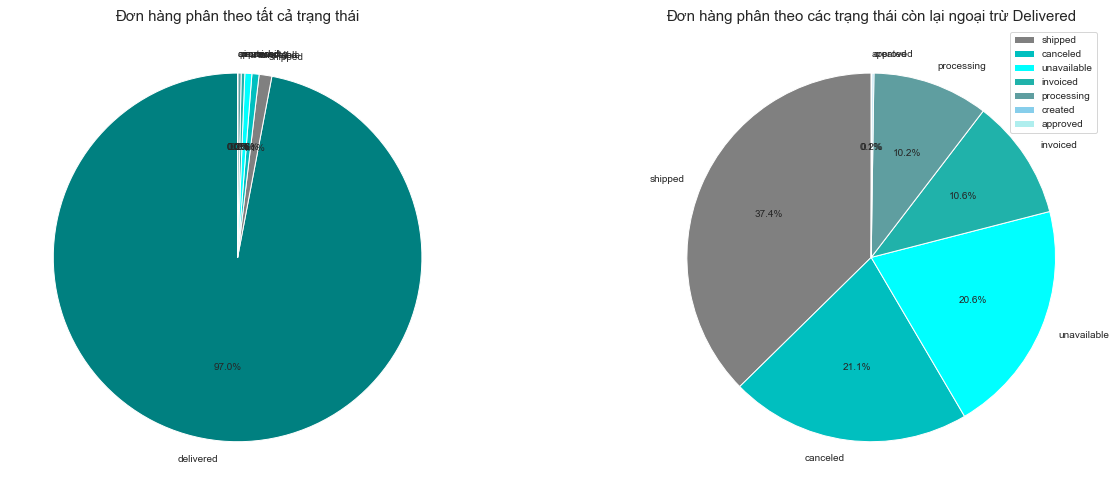

In [842]:
#vẽ pie chart thể hiện thực trạng đơn hàng phân theo trạng thái 
status_data = np.array(order_status['order_id'])
status_without_delivered_data = np.array(order_status_without_delivered['order_id'])
status_label = np.array(order_status['order_status'])
status_without_delivered_label = np.array(order_status_without_delivered['order_status'])
status_color = ['teal', 'grey','c','aqua','lightseagreen','cadetblue','skyblue','paleturquoise']
status_without_delivered_color = ['grey','c','aqua','lightseagreen','cadetblue','skyblue','paleturquoise']
status_explode = [0,0,0,0,0,0,0,0]
status_without_delivered_explode = [0,0,0,0,0,0,0]

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([1.2, 0.1, 0.8, 0.8])
ax1.pie(status_data, labels = status_label, explode = status_explode,  colors = status_color, startangle = 90, autopct='%1.1f%%')
ax2.pie(status_without_delivered_data, labels = status_without_delivered_label, explode = status_without_delivered_explode,  colors = status_without_delivered_color, startangle = 90, autopct='%1.1f%%')
ax1.set_title(label = 'Đơn hàng phân theo tất cả trạng thái', fontsize = 15)
ax2.set_title(label = 'Đơn hàng phân theo các trạng thái còn lại ngoại trừ Delivered', fontsize = 15)

plt.legend()
plt.show()

**<i>Giải thích các trạng thái đơn hàng<i>**: 

    - created: Đơn hàng vừa được tạo (ngay sau khi khách hàng bấm mua hàng)
    - unavailable: Người bán không đáp ứng được đơn hàng 
    - invoiced: Đã xác lập hóa đơn mua hàng 
    - approved: Đơn hàng đã được duyệt 
    - processing: Đơn hàng đang được xử lý (chuyển cho đối tác vận chuyển)
    - shipped: Đơn hàng bắt đầu được đối tác vận chuyển giao tới khách
    - delivered: Đơn đã được giao tới khách hàng

**<i>Note<i>**: Chủ yếu các đơn hàng đã được giao cho khách hàng, tỷ lệ unavailable và canceled tương đối cao

## <a id='4'>4. Order Item Dataset</a>

In [208]:
#dataset
olist_order_items_dataset.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [206]:
#data types 
olist_order_items_dataset.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [207]:
#data shape 
olist_order_items_dataset_shape = olist_order_items_dataset.shape
print('Số bản ghi -', olist_order_items_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_order_items_dataset_shape[1])

Số bản ghi - 112650 

Số trường dữ liệu - 7


Tập dữ liệu có 112650 bản ghi, mỗi bản ghi bao gồm 7 trường dữ liệu: 
- **order_id**: id đơn hàng 
- **order_item_id**: số thứ tự của mặt hàng trong đơn hàng  
- **product_id**: id mặt hàng
- **seller_id**: id người bán 
- **shipping_limit_date**: ngày giới hạn cho người bán chuyển đơn hàng cho đối tác vận chuyển 
- **price**: giá mặt hàng 
- **freight_value**: cước vận chuyển

Cho biết thông tin chi tiết của đơn hàng, các thông tin về sản phẩm trong đơn hàng, người bán, giá sản phẩm, cước vận chuyển...

In [218]:
#mô tả tệp dữ liệu thông qua thống kê các trường dữ liệu
olist_order_items_dataset.describe(include=[np.number])

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### <i>Data Cleaning<i> 

In [213]:
#kiểm tra dữ liệu null 
olist_order_items_dataset.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Kết quả**: không có điểm dữ liệu nào bị trống 

In [215]:
#chuyển kiểu dữ liệu trường shipping_limit_date về dạng datetime
olist_order_items_dataset['shipping_limit_date'] = pd.to_datetime(olist_order_items_dataset['shipping_limit_date'])

## <a id='5'>5. Order Payment Dataset</a>

In [221]:
#dataset
olist_order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [222]:
#data types 
olist_order_payments_dataset.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [223]:
#data shape 
olist_order_payments_dataset_shape = olist_order_payments_dataset.shape
print('Số bản ghi -', olist_order_payments_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_order_payments_dataset_shape[1])

Số bản ghi - 103886 

Số trường dữ liệu - 5


Tập dữ liệu có 103886 bản ghi, mỗi bản ghi có 5 trường dữ liệu: 
- **order_id**: id đơn hàng 
- **payment_sequential**: thứ tự phương thức thanh toán (một đơn hàng có thể được thanh toán bằng nhiều phương thức khác nhau)
- **payment_type**: phương thức thanh toán 
- **payment_installments**: số lần trả góp 
- **payment_value**: tổng tiền thanh toán 

Cho biết chi tiết thông tin thanh toán của khách hàng trên mỗi đơn hàng.

In [227]:
#mô tả tập dữ liệu thông qua thống kê các trường dữ liệu 
olist_order_payments_dataset.describe(include=[np.number])

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### <i>Data Cleaning<i> 

In [224]:
#kiểm tra dữ liệu null
olist_order_payments_dataset.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Kết quả**: Không có điểm dữ liệu nào bị trống 

### <i>Data Exploring<i> 

In [231]:
#mức độ phổ biến các phương thức thanh toán 
olist_order_payments_dataset.value_counts('payment_type')

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
dtype: int64

## <a id='6'>6. Order Reviews Dataset</a>

In [232]:
#dataset
olist_order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [233]:
#data types 
olist_order_reviews_dataset.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [234]:
#data shape 
olist_order_reviews_dataset_shape = olist_order_reviews_dataset.shape
print('Số bản ghi -', olist_order_reviews_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_order_reviews_dataset_shape[1])

Số bản ghi - 100000 

Số trường dữ liệu - 7


Tập dữ liệu có 100000 bản ghi, mỗi bản ghi bao gồm 7 trường dữ liệu: 
- **review_id**: id đánh giá                   
- **order_id**: id đơn hàng     
- **review_score**: điểm đánh giá (từ 1 đến 5)                 
- **review_comment_title**: tiêu đề nhận xét từ bài đánh giá        
- **review_comment_message**: nội dung đánh giá      
- **review_creation_date**: ngày khảo sát đánh giá được gửi cho khách hàng         
- **review_answer_timestamp**: ngày phản hồi đánh giá     

Sau khi khách hàng nhận được hàng hoặc tới hạn ngày ước tính giao hàng đến khách hàng, một khảo sát đánh giá sẽ được gửi cho khách hàng để họ đưa ra những nhận xét đánh giá về trải nghiệm mua hàng.

In [242]:
olist_order_reviews_dataset[['review_score','review_creation_date','review_answer_timestamp']].describe(include='all')

<ipython-input-242-cc90fe2d7c8c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  olist_order_reviews_dataset[['review_score','review_creation_date','review_answer_timestamp']].describe(include='all')
<ipython-input-242-cc90fe2d7c8c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  olist_order_reviews_dataset[['review_score','review_creation_date','review_answer_timestamp']].describe(include='all')


,review_score,review_creation_date,review_answer_timestamp
count,100000.000000,100000,100000
unique,NaN,637,99010
top,NaN,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,NaN,466,4
first,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,4.070890,NaN,NaN
std,1.359663,NaN,NaN
min,1.000000,NaN,NaN
25%,4.000000,NaN,NaN


### <i>Data Cleaning<i> 

In [235]:
#kiểm tra dữ liệu null 
olist_order_reviews_dataset.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Kết quả**: trường **review_comment_title, review_comment_message** có nhiều điểm dữ liệu bị trống, nhưng điều này là bình thường do khách hàng cũng có thể chỉ cho điểm đánh giá và không đưa ra nhận xét gì thêm.

In [236]:
#kiểm tra trùng lặp dữ liệu theo trường review_id và order_id 
a = olist_order_reviews_dataset.duplicated(subset=['review_id','order_id'])
a.value_counts()

False    100000
dtype: int64

**Kết quả**: Không có trùng lặp dữ liệu

In [240]:
#chuyển kiểu dữ liệu trường review_creation_date, review_answer_timestamp sang kiểu datetime 
olist_order_reviews_dataset['review_creation_date']= pd.to_datetime(olist_order_reviews_dataset['review_creation_date'])
olist_order_reviews_dataset['review_answer_timestamp']= pd.to_datetime(olist_order_reviews_dataset['review_answer_timestamp'])

### <i>Data Exploring<i> 

In [244]:
#điểm đánh giá trung bình của các đơn hàng 
print('Điểm đánh giá trung bình của các đơn hàng:', olist_order_reviews_dataset['review_score'].mean())

Điểm đánh giá trung bình của các đơn hàng: 4.07089


## <a id='7'>7. Products Dataset</a>

In [245]:
#dataset
olist_products_dataset.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [246]:
#data types 
olist_products_dataset.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [247]:
#data shape 
olist_products_dataset_shape = olist_products_dataset.shape
print('Số bản ghi -', olist_products_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_products_dataset_shape[1])

Số bản ghi - 32951 

Số trường dữ liệu - 9


Tập dữ liệu có 32951 bản ghi, mỗi bản ghi có 9 trường dữ liệu: 
- **product_id**: id mặt hàng  
- **product_category_name**: tên mặt hàng 
- **product_name_lenght**: độ dài ký tự của tên mặt hàng  
- **product_description_lenght**: độ dài ký tự của mô tả mặt hàng
- **product_photos_qty**: số ảnh mặt hàng được hiển thị 
- **product_weight_g**: cân nặng mặt hàng 
- **product_length_cm**: kích thước chiều dài mặt hàng 
- **product_height_cm**: kích thước chiều cao mặt hàng  
- **product_width_cm**: kích thước chiều rộng mặt hàng  

Cho biết thông tin chi tiết của mặt hàng 

In [251]:
#mô tả tập dữ liệu thông qua thống kê các trường dữ liệu
olist_products_dataset.describe(include=[np.number])

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### <i>Data Cleaning<i> 

In [249]:
#kiểm tra dữ liệu null 
olist_products_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Kết quả**: trường product_id không có điểm dữ liệu nào bị trống, đạt yêu cầu

In [250]:
#kiểm tra trùng lặp dữ liệu theo trường product_id 
a = olist_products_dataset.duplicated(subset=['product_id'])
a.value_counts()

False    32951
dtype: int64

**Kết quả**: Không có trùng lặp dữ liệu

## <a id='8'>8. Sellers Dataset</a>

In [253]:
#dataset
olist_sellers_dataset.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [255]:
#data types 
olist_sellers_dataset.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [256]:
#data shape 
olist_sellers_dataset_shape = olist_sellers_dataset.shape
print('Số bản ghi -', olist_sellers_dataset_shape[0],'\n')
print('Số trường dữ liệu -', olist_sellers_dataset_shape[1])

Số bản ghi - 3095 

Số trường dữ liệu - 4


Tập dữ liệu có 3095 bản ghi, mỗi bản ghi có 4 trường dữ liệu: 
- **seller_id**: id người bán 
- **seller_zip_code_prefix**: mã zip code 
- **seller_city**: tên thành phố
- **seller_state**: tên bang 

Cho biết thông tin chi tiết của người bán

### <i>Data Cleaning<i> 

In [257]:
#kiểm tra dữ liệu null 
olist_sellers_dataset.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Kết quả**: Không có điểm dữ liệu nào bị trống

In [259]:
#kiểm tra trùng lặp dữ liệu 
a = olist_sellers_dataset.duplicated(subset=['seller_id'])
a.value_counts()

False    3095
dtype: int64

**Kết quả**: không bị trùng lặp dữ liệu

### <i>Data Exploring<i> 

In [260]:
#top 20 thành phố có nhiều người bán nhất 
olist_sellers_dataset[['seller_city']].value_counts()

seller_city   
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Length: 611, dtype: int64

In [261]:
#top 20 bang có nhiều người bán nhất 
olist_sellers_dataset[['seller_state']].value_counts()

seller_state
SP              1849
PR               349
MG               244
SC               190
RJ               171
RS               129
GO                40
DF                30
ES                23
BA                19
CE                13
PE                 9
PB                 6
MS                 5
RN                 5
MT                 4
RO                 2
SE                 2
AC                 1
PI                 1
AM                 1
MA                 1
PA                 1
dtype: int64

## <a id='9'>9. Product Category Name Translation Dataset</a>

In [262]:
#dataset
product_category_name_translation.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [263]:
#data type 
product_category_name_translation.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [264]:
#data shape 
product_category_name_translation_shape = product_category_name_translation.shape
print('Số bản ghi -', product_category_name_translation_shape[0],'\n')
print('Số trường dữ liệu -', product_category_name_translation_shape[1])

Số bản ghi - 71 

Số trường dữ liệu - 2


Tập dữ liệu có 71 bản ghi, mỗi bản ghi gồm 2 trường dữ liệu: 
- **product_category_name**: tên nhóm mặt hàng 
- **product_category_name_english**: tên nhóm mặt hàng (tiếng anh)

Dịch sang tiếng anh tên các nhóm mặt hàng 

### <i>Data Cleaning<i> 

In [265]:
#kiểm tra dữ liệu null 
product_category_name_translation.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

**Kết quả**: không có điểm dữ liệu nào bị trống 

In [266]:
#kiểm tra trùng lặp dữ liệu 
a = product_category_name_translation.duplicated(subset=['product_category_name','product_category_name_english'])
a.value_counts()

False    71
dtype: int64

**Kết quả**: Không có trùng lặp dữ liệu

# <a id='section2'>Section 2 - Business Acumen</a>

In [333]:
#import thư viện sqlite3
import sqlite3

In [334]:
#cài đặt thư viện ipython_sql
!pip install ipython-sql

  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13699 sha256=d57e2ee10606aaadf9f6569fd1e8203be526659f39a02748e6b8ee676d2bb6d6
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\48\6d\77\9517cb933af254f51a446f1a5ec9c2be3e45f17384940bce68
Successfully built prettytable


In [593]:
#mở kết nối
cnn = sqlite3.connect('brazilian_ecommerce.db')

In [595]:
#thêm bảng order dataset vào db
olist_orders_dataset.to_sql('olist_orders_dataset_new', cnn)

In [596]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [597]:
%sql sqlite:///brazilian_ecommerce.db

## **Metrics** 

## <a id='sales'>1. Sales</a>

### <a id='total_order'>Total of Orders - Tổng số đơn hàng</a>

In [561]:
#bổ sung trường dữ liệu ngày tháng năm từ trường order_purchase_timestamp
olist_orders_dataset['order_purchase_year'] = olist_orders_dataset['order_purchase_timestamp'].apply(lambda x: x.year)
olist_orders_dataset['order_purchase_month'] = olist_orders_dataset['order_purchase_timestamp'].apply(lambda x: x.month)
olist_orders_dataset['order_purchase_month_name'] = olist_orders_dataset['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
olist_orders_dataset['order_purchase_year_month'] = olist_orders_dataset['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y.%m'))
olist_orders_dataset['order_purchase_date'] = olist_orders_dataset['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y,%m,%d'))

In [649]:
#tổng số đơn hàng theo từng tháng, từng năm
barchart_order_bytime = %sql select order_purchase_year, order_purchase_month, count(order_id) as total_order from olist_orders_dataset_new group by order_purchase_year, order_purchase_month

 * sqlite:///brazilian_ecommerce.db
Done.


In [650]:
#chuyển kết quả query về dạng dataframe
barchart_order_bytime = pd.DataFrame(barchart_order_bytime)

In [651]:
#đổi tên cột dataframe vừa tạo
barchart_order_bytime = barchart_order_bytime.rename(columns={0:'Year',1:'Month',2:'Total_order'})

**<i>Tổng số đơn hàng theo năm, tháng<i>**

In [652]:
#hiển thị dưới dạng pivot table 
pd.pivot_table(barchart_order_bytime, values="Total_order", index=["Year","Month"], aggfunc=np.sum) 

Total_order
Year Month             
2016 9                4
     10             324
     12               1
2017 1              800
     2             1780
     3             2682
     4             2404
     5             3700
     6             3245
     7             4026
     8             4331
     9             4285
     10            4631
     11            7544
     12            5673
2018 1             7269
     2             6728
     3             7211
     4             6939
     5             6873
     6             6167
     7             6292
     8             6512
     9               16
     10               4

 * sqlite:///brazilian_ecommerce.db
Done.


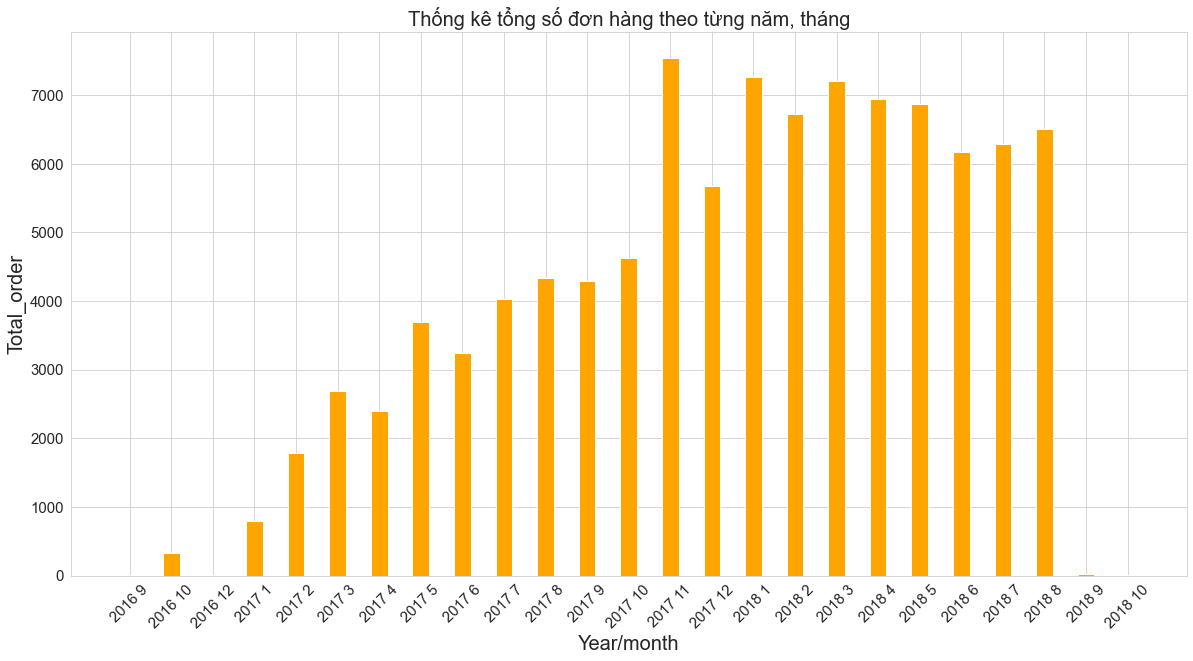

In [832]:
#vẽ biểu đồ thống kê tổng số đơn hàng theo từng năm. từng tháng 
barchart_order_bytime_draw = %sql select order_purchase_year, order_purchase_month, count(order_id) as total_order from olist_orders_dataset_new group by order_purchase_year, order_purchase_month
plt.figure(figsize=(20,10))
barchart_order_bytime_draw.bar(width=0.4, color = 'orange')
plt.title(label = 'Thống kê tổng số đơn hàng theo từng năm, tháng', fontsize=20)
plt.xlabel('Year/month', fontsize=20)
plt.ylabel('Total_order', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

**Nhận xét**: 
- Tổng số đơn hàng có sự **chênh lệch lớn giữa các năm**:, năm 2018 có nhiều hơn so với các năm khác trong bộ dữ liệu. 
- Xét trong một năm, lượng đơn hàng**tăng vọt vào các tháng cuối và đầu năm**, trùng với **các đợt lễ lớn** trong năm như giáng sinh, tết dương, tập trung nhiều nhất vào **tháng 11, 12 và tháng 1**, lượng đơn hàng những tháng này dao động từ **6-7000** đơn/tháng.

==> Cần lưu ý phân bổ nguồn lực, tập trung vào mua cao điểm để có thể xử lý đượng lơn đơn hàng lớn như vậy

In [610]:
#thêm các bảng còn lại từ dataset vào db
olist_customers_dataset.to_sql('olist_customers_dataset', cnn)
olist_geolocation_dataset.to_sql('olist_geolocation_dataset', cnn)
olist_order_items_dataset.to_sql('olist_order_items_dataset', cnn)
olist_order_payments_dataset.to_sql('olist_order_payments_dataset', cnn)
olist_order_reviews_dataset.to_sql('olist_order_reviews_dataset', cnn)
olist_products_dataset.to_sql('olist_products_dataset', cnn)
olist_sellers_dataset.to_sql('olist_sellers_dataset', cnn)
product_category_name_translation.to_sql('product_category_name_translation', cnn)

**<i>Tổng số đơn hàng theo thành phố<i>**

In [834]:
#tổng số đơn hàng theo thành phố (lấy 20 thành phố có tổng số đơn hàng nhiều nhất)
barchart_order_bycity = %sql select cust.customer_city, count(ord.order_id) as total_order from olist_customers_dataset as cust inner join olist_orders_dataset_new as ord on cust.customer_id = ord.customer_id group by cust.customer_city order by total_order desc limit 100
#chuyển kết quả query về dạng dataframe
barchart_order_bycity = pd.DataFrame(barchart_order_bycity)
#đổi tên cột dataframe vừa tạo
barchart_order_bycity = barchart_order_bycity.rename(columns={0:'City',1:'Total_order'})
barchart_order_bycity

 * sqlite:///brazilian_ecommerce.db
Done.


,City,Total_order
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
95,ponta grossa,143
96,governador valadares,141
97,aracatuba,141
98,manaus,140


In [661]:
#cài đặt thư viện squarify
!pip install squarify

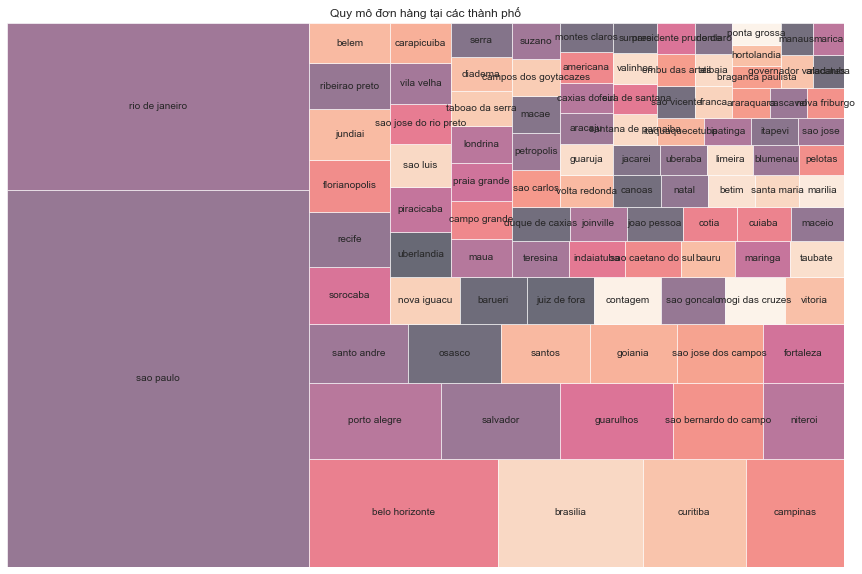

In [700]:
#vẽ biểu đồ thể hiện quy mô đơn hàng của các thành phố 
import squarify
plt.figure(figsize=(15,10))
sns.set_style(style="whitegrid") # set seaborn plot style
sizes= barchart_order_bycity["Total_order"].values# proportions of the categories
label=barchart_order_bycity["City"]
squarify.plot(sizes=sizes, label=label, alpha=0.6).set(title='Quy mô đơn hàng tại các thành phố')
plt.axis('off')
plt.show()

**Nhận xét**: 
- **Sao Paulo, Rio De Janeiro, Belo Horizonte** là những thành phố có **lượng đơn hàng lớn nhất**. Đây là 3 thành phố lớn tại Brazil, tập trung đông dân cư, hạ tầng mạng, công nghệ, giao thông phát triển, cũng là những điều kiện thúc đẩy sự phát triển ở những khu vực này
- **Aracatuba, Manaus, Marica** là những thành phố có lượng đơn hàng nhỏ nhất, chỉ khoảng hơn 100 đơn hàng/tháng
- Các thành phố khác như **Salvador, Jundiai, Campinas** có số lượng đơn tương đối 

==> Tiếp tục lên chiến lược tăng trưởng lượng đơn tại các thành phố lớn thông qua các chương trình khuyến mãi, mở rộng kết nối thêm nhiều người bán tại các khu vực này. Đối với các thành phố khác, tập trung triển khai các chiến dịch truyền thông để gia tăng nhận thức về nền tảng, tăng tỷ lệ tiếp cận tới sàn và có khả năng nâng cao được tỷ lệ chuyển đổi.

### **<a id='total_gmv'>GMV</a>** 

**<i>GMV theo từng tháng, năm<i>**

In [659]:
#GMV theo từng tháng từng năm 
gmv_bytime = %sql select ord.order_purchase_year, ord.order_purchase_month, sum(payment.payment_value) as GMV from olist_orders_dataset_new as ord inner join olist_order_payments_dataset as payment on ord.order_id = payment.order_id group by ord.order_purchase_year, ord.order_purchase_month

 * sqlite:///brazilian_ecommerce.db
Done.


In [660]:
#chuyển kết quả query về dạng dataframe
gmv_bytime = pd.DataFrame(gmv_bytime)
#đổi tên cột dataframe vừa tạo
gmv_bytime = gmv_bytime.rename(columns={0:'Year',1:'Month',2:'GMV'})
#hiển thị dưới dạng pivot table 
pd.pivot_table(gmv_bytime, values="GMV", index=["Year","Month"], aggfunc=np.sum) 

GMV
Year Month            
2016 9          252.24
     10       59090.48
     12          19.62
2017 1       138488.04
     2       291908.01
     3       449863.60
     4       417788.03
     5       592918.82
     6       511276.38
     7       592382.92
     8       674396.32
     9       727762.45
     10      779677.88
     11     1194882.80
     12      878401.48
2018 1      1115004.18
     2       992463.34
     3      1159652.12
     4      1160785.48
     5      1153982.15
     6      1023880.50
     7      1066540.75
     8      1022425.32
     9         4439.54
     10         589.67

 * sqlite:///brazilian_ecommerce.db
Done.


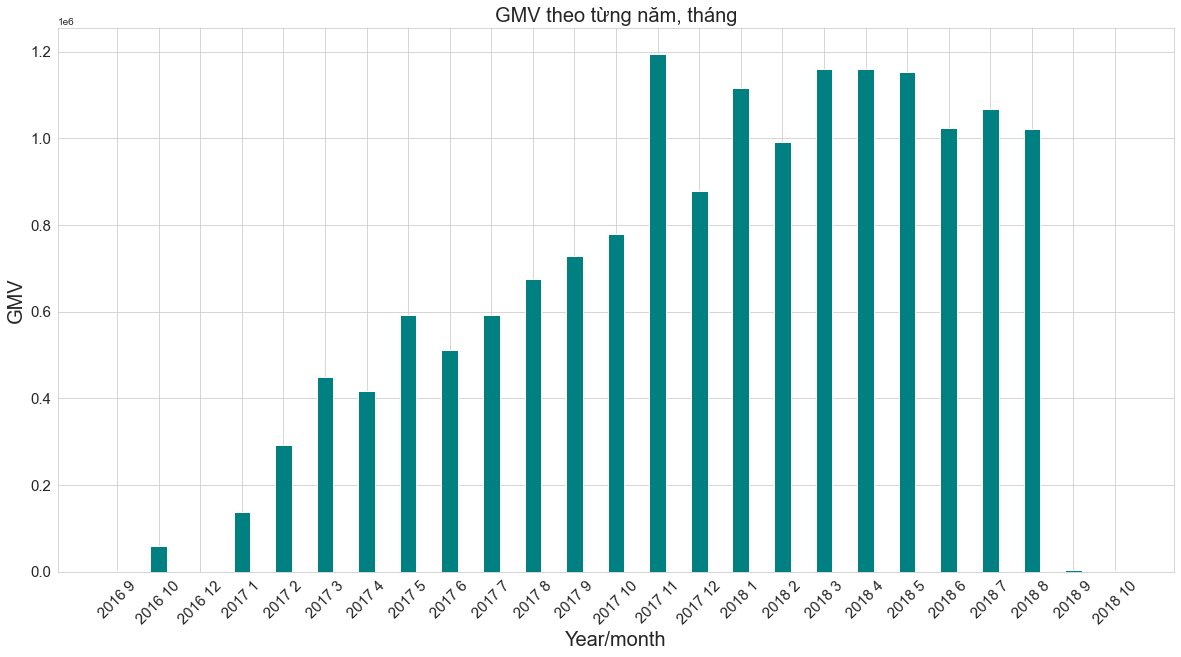

In [690]:
#vẽ biểu đồ thống kê tổng số đơn hàng theo từng năm. từng tháng 
gmv_bytime_draw = %sql select ord.order_purchase_year, ord.order_purchase_month, sum(payment.payment_value) as GMV from olist_orders_dataset_new as ord inner join olist_order_payments_dataset as payment on ord.order_id = payment.order_id group by ord.order_purchase_year, ord.order_purchase_month
plt.figure(figsize=(20,10))
gmv_bytime_draw.bar(width=0.4, color = 'teal')
plt.title(label = 'GMV theo từng năm, tháng', fontsize=20)
plt.xlabel('Year/month', fontsize=20)
plt.ylabel('GMV', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

**Nhận xét**:

- Kết quả cho thấy chỉ số GMV các tháng phụ thuộc và tỷ lệ thuận với lượng đơn trong tháng
- Cuối năm 2017, GMV tháng 11 tăng mạnh, đạt ngưỡng khoảng 1.2M đô, sau đó sụt giảm vào tháng 12 vì một lý do nào đó (chưa rõ nguyên nhân). 
- GMV trung bình 2018 tương đối cao, có thể trên trên biểu đồ, 8 tháng đầu năm đều đạt trên 1M đô.
    
==> Cần tìm hiểu rõ nguyên nhân các tháng có GMV thấp và đưa ra các giải pháp để xử lý

**<i>GMV theo thành phố<i>**

In [733]:
#Hiển thị GMV của các thành phố 
gmv_by_city_main = %sql select cust.customer_city, sum(payment.payment_value) as GMV from olist_order_payments_dataset as payment inner join olist_orders_dataset_new as ord on payment.order_id = ord.order_id inner join olist_customers_dataset as cust on ord.customer_id = cust.customer_id group by cust.customer_city order by GMV desc
gmv_by_city_main

 * sqlite:///brazilian_ecommerce.db
Done.


customer_city,GMV
sao paulo,2203373.090000004
rio de janeiro,1161927.3599999964
belo horizonte,421765.1199999998
brasilia,354216.77999999985
curitiba,247392.48000000024
porto alegre,224731.42000000036
salvador,218071.50000000006
campinas,216248.42999999988
guarulhos,165121.98999999958
niteroi,139996.98999999996


In [735]:
#lấy ra top10 thành phố có GMV cao nhất 
gmv_by_city_max = %sql select cust.customer_city, sum(payment.payment_value) as GMV from olist_order_payments_dataset as payment inner join olist_orders_dataset_new as ord on payment.order_id = ord.order_id inner join olist_customers_dataset as cust on ord.customer_id = cust.customer_id group by cust.customer_city order by GMV desc limit 10
#chuyển kết quả query về dạng dataframe
gmv_by_city_max = pd.DataFrame(gmv_by_city_max)
#đổi tên cột dataframe vừa tạo
gmv_by_city_max = gmv_by_city_max.rename(columns={0:'customer_city',1:'GMV'})

 * sqlite:///brazilian_ecommerce.db
Done.


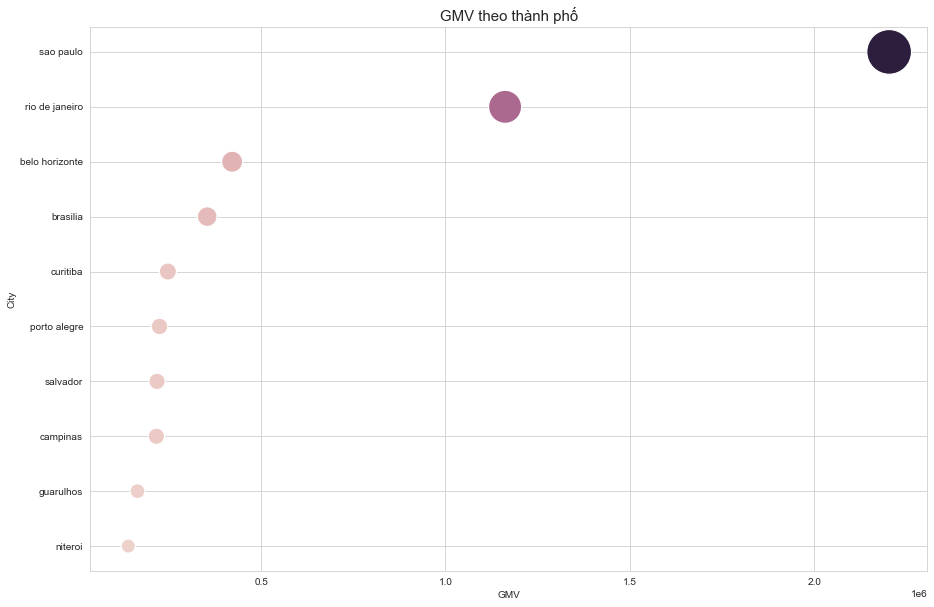

In [836]:
#vẽ biểu đồ thống kê tổng số đơn hàng theo thành phố
plt.figure(figsize=(15,10))
sns.scatterplot(data=gmv_by_city_max, x="GMV", y="customer_city", hue="GMV", size="GMV", legend=False, sizes=(200, 2000))
plt.title(label = 'GMV theo thành phố', fontsize=15)
plt.xlabel('GMV', fontsize=10)
plt.ylabel('City', fontsize=10)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

**Nhận xét**: 
- Tương tự quy mô đơn hàng tại các thành phố đã phân tích ở trên, **Sao Paulo và Rio De Janeiro** là 2 thành phố có GMV lớn nhất lớn hơn 1M đô, riêng Sao Paulo đạt trên 2M đô. 
- Các thành phố khác trong top 10 thành phố có GMV lớn nhất thì đa phần GMV < 0.5M đô. 

==> Lên kế hoạch tăng trưởng mức GMV ở các thành phố khác 

In [737]:
#lấy ra top10 thành phố có GMV nhỏ nhất 
gmv_by_city_min = %sql select cust.customer_city, sum(payment.payment_value) as GMV from olist_order_payments_dataset as payment inner join olist_orders_dataset_new as ord on payment.order_id = ord.order_id inner join olist_customers_dataset as cust on ord.customer_id = cust.customer_id group by cust.customer_city order by GMV asc limit 10
#chuyển kết quả query về dạng dataframe
gmv_by_city_min = pd.DataFrame(gmv_by_city_min)
#đổi tên cột dataframe vừa tạo
gmv_by_city_min = gmv_by_city_min.rename(columns={0:'customer_city',1:'GMV'})

 * sqlite:///brazilian_ecommerce.db
Done.


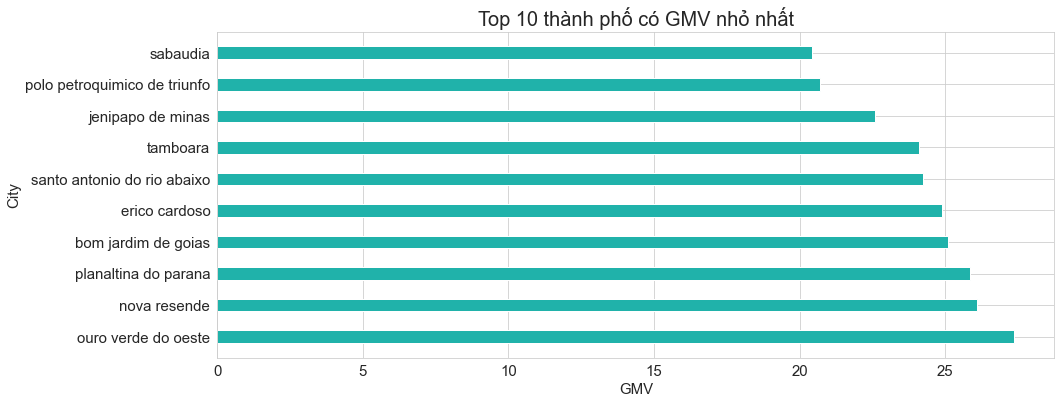

In [742]:
x_gmv_city_min = np.array(gmv_by_city_min['customer_city'])
y_gmv_city_min = np.array(gmv_by_city_min['GMV'])

plt.figure(figsize=(15,6)) 
plt.barh(x_gmv_city_min,y_gmv_city_min, height = 0.4, color = 'lightseagreen')
plt.title(label = "Top 10 thành phố có GMV nhỏ nhất", fontsize=20)
plt.xlabel('GMV', fontsize=15)
plt.ylabel('City', fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.gca().invert_yaxis()

plt.show()

**Nhận xét**: 
- Trên đây là 10 thành phố có GMV nhỏ nhất, GMV ở những thành phố này rất thấp, chỉ rơi vào khoảng trên 20 đô. 

## <a id='price'>2. Prices</a> 

**<i>Giá trị đơn hàng trung bình theo ngành hàng<i>**

In [750]:
#Giá trị đơn hàng trung bình theo từng ngành hàng
%%sql select pd_translate.product_category_name_english, sum(payment.payment_value)/count(ord_item.order_id) as avg_order_value from olist_products_dataset as pd inner join product_category_name_translation as pd_translate on pd_translate.product_category_name = pd.product_category_name inner join olist_order_items_dataset as ord_item on pd.product_id = ord_item.product_id inner join olist_order_payments_dataset as payment on payment.order_id = ord_item.order_id group by pd_translate.product_category_name_english order by avg_order_value desc

 * sqlite:///brazilian_ecommerce.db
Done.


product_category_name_english,avg_order_value
computers,1268.7343181818192
fixed_telephony,763.8754981549808
small_appliances_home_oven_and_coffee,656.7861538461539
agro_industry_and_commerce,471.15321428571417
home_appliances_2,464.78902985074654
office_furniture,363.7944263217093
signaling_and_security,340.7365671641788
construction_tools_safety,330.1056783919599
musical_instruments,324.61576601671334
small_appliances,321.8036804564912


 * sqlite:///brazilian_ecommerce.db
Done.


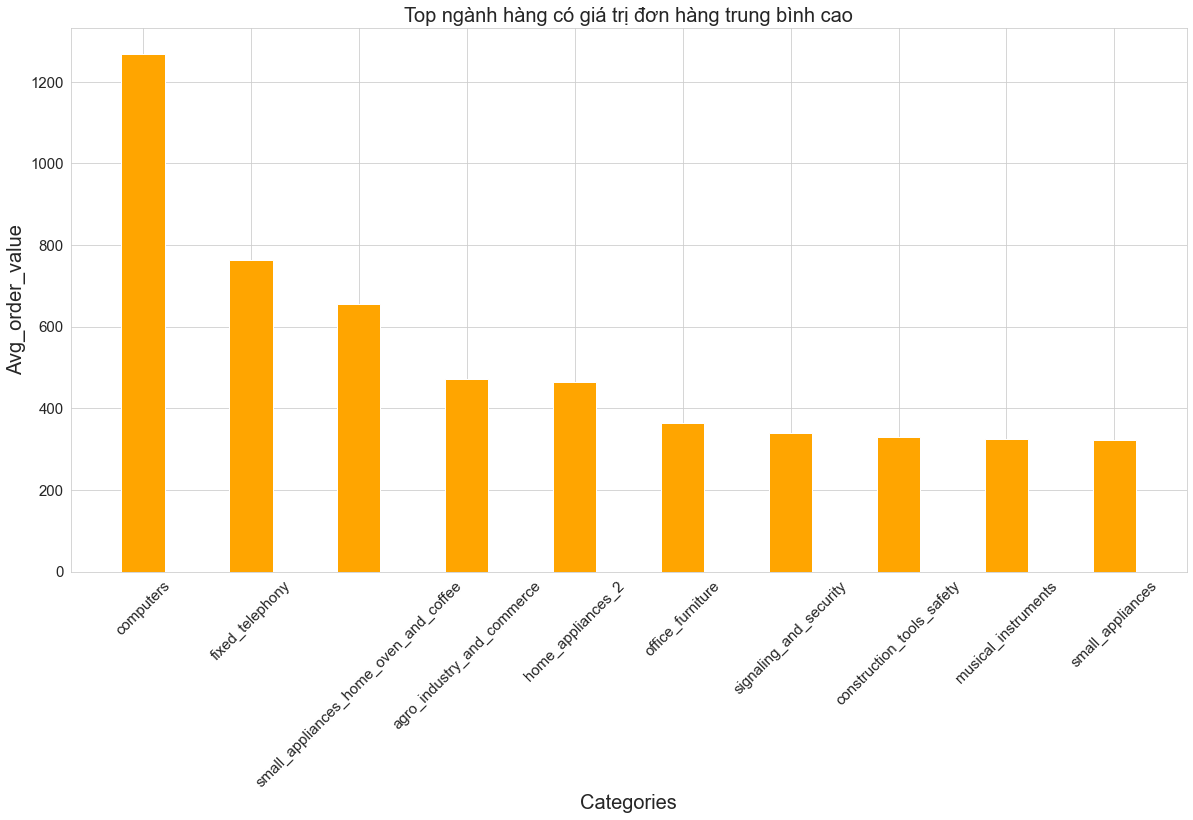

In [837]:
#vẽ biểu đồ hiển thị top10 ngành hàng có giá trị đơn hàng trung bình cao nhất
avg_order_value_draw = %sql select pd_translate.product_category_name_english, sum(payment.payment_value)/count(ord_item.order_id) as avg_order_value from olist_products_dataset as pd inner join product_category_name_translation as pd_translate on pd_translate.product_category_name = pd.product_category_name inner join olist_order_items_dataset as ord_item on pd.product_id = ord_item.product_id inner join olist_order_payments_dataset as payment on payment.order_id = ord_item.order_id group by pd_translate.product_category_name_english order by avg_order_value desc limit 10
plt.figure(figsize=(20,10))
avg_order_value_draw.bar(width=0.4, color = 'orange')
plt.title(label = 'Top ngành hàng có giá trị đơn hàng trung bình cao', fontsize=20)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Avg_order_value', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

**Nhận xét**: 
- Có thể thấy Máy tính, Điện thoại cố định và Thiết bị, Đồ dùng gia dụng là những ngành hàng có giá trị đơn hàng trung bình lớn, dao độngt ừ 500-1200 đô/đơn hàng.

# <a id='payment'>3. Payment</a>

**<i>Mức độ phổ biến của các phương thức thanh toán<i>**

In [757]:
order_by_paymenttype = %sql select payment_type, count(order_id) as total_order from olist_order_payments_dataset group by payment_type order by total_order
#chuyển kết quả query về dạng dataframe
order_by_paymenttype = pd.DataFrame(order_by_paymenttype)
#đổi tên cột dataframe vừa tạo
order_by_paymenttype = order_by_paymenttype.rename(columns={0:'payment_type',1:'total_order'})
order_by_paymenttype

 * sqlite:///brazilian_ecommerce.db
Done.


,payment_type,total_order
0,not_defined,3
1,debit_card,1529
2,voucher,5775
3,boleto,19784
4,credit_card,76795


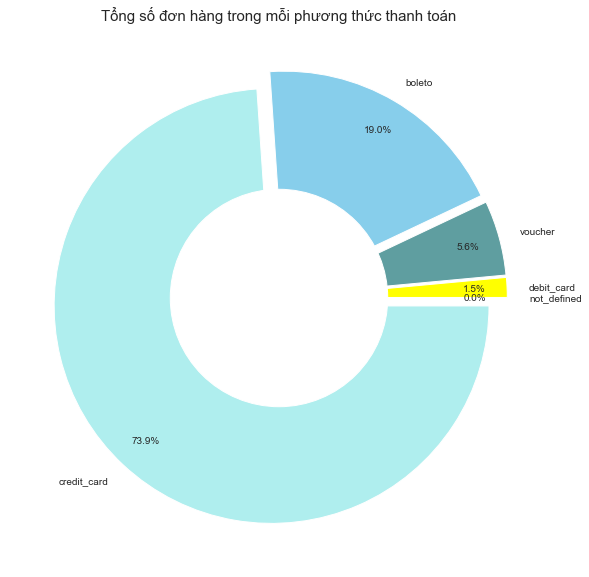

In [766]:
# colors
colors = ['aqua','yellow','cadetblue','skyblue','paleturquoise']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
#figure
plt.figure(figsize=(15,10)) 
# Pie Chart
plt.pie(order_by_paymenttype['total_order'], colors=colors, labels=order_by_paymenttype['payment_type'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, )
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Tổng số đơn hàng trong mỗi phương thức thanh toán', fontsize=15)
  
plt.show()

**Nhận xét**: 
- Credit card và Boleto là 2 phương thức thanh toán được sử dụng nhiều nhất trong các giao dịch, cụ thể 73.9% giao dịch thanh toán bằng Credit card và 19% thanh toán bằng Boleto, khoảng 7% giao dịch là các phương thức khác.  
(Boleto là một phương thức thanh toán trả sau rất phổ biến tại Brazil)

**<i>Doanh thu từ các phương thức thanh toán<i>**

In [763]:
revenue_by_paymenttype = %sql select payment_type, sum(payment_value) as revenue from olist_order_payments_dataset group by payment_type order by revenue
#chuyển kết quả query về dạng dataframe
revenue_by_paymenttype = pd.DataFrame(revenue_by_paymenttype)
#đổi tên cột dataframe vừa tạo
revenue_by_paymenttype = revenue_by_paymenttype.rename(columns={0:'payment_type',1:'revenue'})
revenue_by_paymenttype

 * sqlite:///brazilian_ecommerce.db
Done.


,payment_type,revenue
0,not_defined,0.000000e+00
1,debit_card,2.179898e+05
2,voucher,3.794369e+05
3,boleto,2.869361e+06
4,credit_card,1.254208e+07


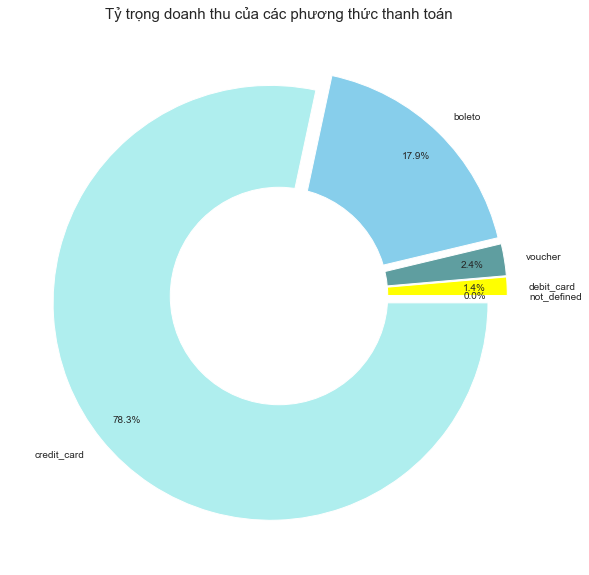

In [768]:
# colors
colors = ['aqua','yellow','cadetblue','skyblue','paleturquoise']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
#figure
plt.figure(figsize=(15,10)) 
# Pie Chart
plt.pie(revenue_by_paymenttype['revenue'], colors=colors, labels=order_by_paymenttype['payment_type'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, )
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Tỷ trọng doanh thu của các phương thức thanh toán', fontsize=15)
  
plt.show()

**Nhận xét**: 
- Tỷ lệ thuận với mức độ phổ biến các phương thức thanh toán, Credit card và Boleto là 2 phương thức có doanh thu lớn nhất. 

**<i>Số lần trả góp<i>**

In [773]:
#tính số lần trả góp trung bình 
avg_num_installments = %sql select sum(payment_installments)/count(order_id) as avg_num_istallments from olist_order_payments_dataset
avg_num_installments 

 * sqlite:///brazilian_ecommerce.db
Done.


avg_num_istallments
2


In [781]:
#số đơn hàng theo số lần trả góp
num_installment = %sql select payment_installments, count(order_id) as count_order from olist_order_payments_dataset group by payment_installments
#chuyển kết quả query về dạng dataframe
num_installment = pd.DataFrame(num_installment)
#đổi tên cột dataframe vừa tạo
num_installment = num_installment.rename(columns={0:'num_installment',1:'num_order'})
num_installment

 * sqlite:///brazilian_ecommerce.db
Done.


,num_installment,num_order
0,0,2
1,1,52546
2,2,12413
3,3,10461
4,4,7098
5,5,5239
6,6,3920
7,7,1626
8,8,4268
9,9,644


 * sqlite:///brazilian_ecommerce.db
Done.


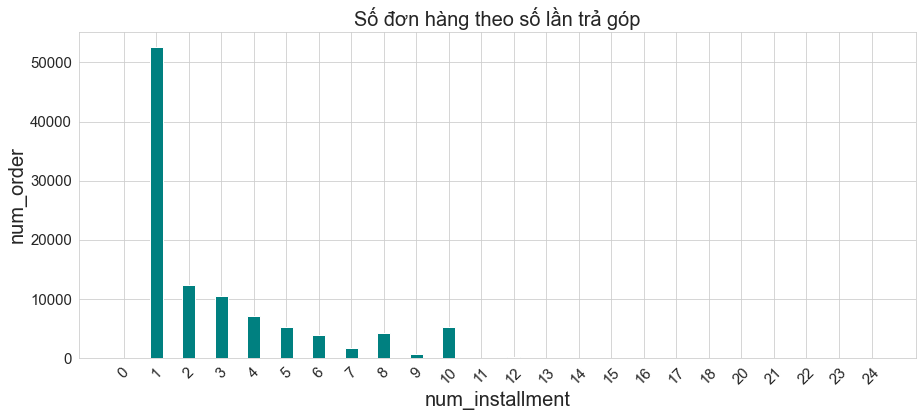

In [790]:
#vẽ biểu đồ hiển thị top10 ngành hàng có giá trị đơn hàng trung bình cao nhất
installment_draw = %sql select payment_installments, count(order_id) as count_order from olist_order_payments_dataset group by payment_installments

plt.figure(figsize=(15,6))
installment_draw.bar(width=0.4, color = 'teal')
plt.title(label = 'Số đơn hàng theo số lần trả góp', fontsize=20)
plt.xlabel('num_installment', fontsize=20)
plt.ylabel('num_order', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

**Nhận xét**: 
- Mỗi đơn hàng có thể được thanh toán nhiều lần, theo số liệu phân tích, đa phần khách hàng đều thanh toán trong 1 lần.

### <a id='categories'>4. Categories</a> 

In [797]:
top_categ =  %sql select pd_translate.product_category_name_english, count(ord_item.order_item_id) as sales_num, sum(payment.payment_value) as revenue from olist_products_dataset as pd inner join product_category_name_translation as pd_translate on pd_translate.product_category_name = pd.product_category_name inner join olist_order_items_dataset as ord_item on pd.product_id = ord_item.product_id inner join olist_order_payments_dataset as payment on payment.order_id = ord_item.order_id group by pd_translate.product_category_name_english order by revenue desc limit 10
#chuyển kết quả query về dạng dataframe
top_categ = pd.DataFrame(top_categ)
#đổi tên cột dataframe vừa tạo
top_categ = top_categ.rename(columns={0:'product_category_name_english',1:'sales_num',2:'revenue'})
top_categ

 * sqlite:///brazilian_ecommerce.db
Done.


,product_category_name_english,sales_num,revenue
0,bed_bath_table,11823,1712553.67
1,health_beauty,9972,1657373.12
2,computers_accessories,8082,1585330.45
3,furniture_decor,8744,1430176.39
4,watches_gifts,6201,1429216.68
5,sports_leisure,8945,1392127.56
6,housewares,7355,1094758.13
7,auto,4379,852294.33
8,garden_tools,4574,838280.75
9,cool_stuff,3987,779698.00


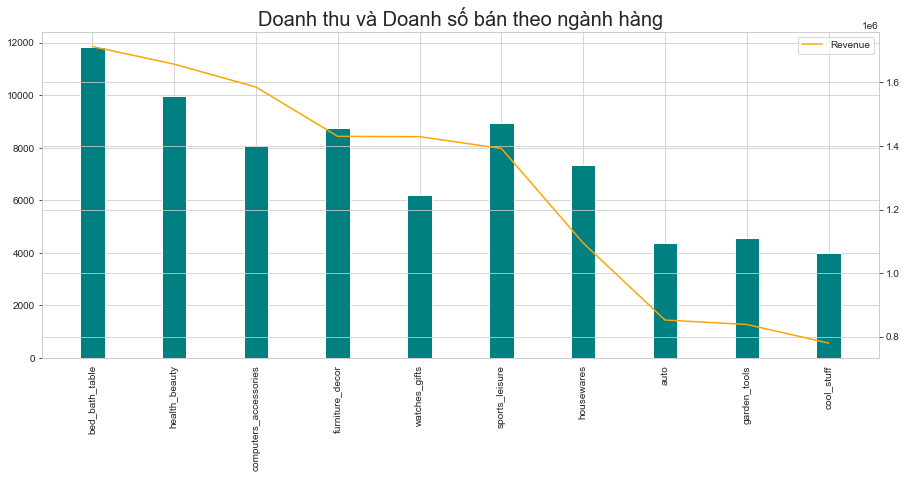

In [814]:
X = top_categ['product_category_name_english']
sales_num = top_categ['sales_num']
revenue = top_categ['revenue']

fig, ax1 = plt.subplots(figsize=(15,6))
plt.title(label = "Doanh thu và Doanh số bán theo ngành hàng", fontsize=20)
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10)
ax1.bar(X, sales_num, width = 0.3, color= 'teal', label = 'Sales_num')

ax2 = ax1.twinx()
ax2.plot(X, revenue, color= 'orange', label = 'Revenue')
ax2.legend(fontsize=10)
plt.show()

**Nhận xét**: 
- Các ngành hàng có doanh số bán hàng cao nhất là đồ gia dụng, sức khỏe và làm đẹp, thiết bị điện tử
- Một số ngành hàng có doanh số bán không cao nhưng doanh thu lại rất cao, điển hình như thiết bị điện tử, đồng hồ. Một số ngành thì có doanh số bán hàng cao nhưng doanh thu lại rất nhấp như đồ làm vườn, đồ làm mát 

### <a id='freight'>5. Freight</a>

In [823]:
freight = %sql select pd_translate.product_category_name_english, sum(ord_item.freight_value) as freight_value, 100*sum(ord_item.freight_value)/sum(payment.payment_value) as freight_value_rate from olist_products_dataset as pd inner join product_category_name_translation as pd_translate on pd_translate.product_category_name = pd.product_category_name inner join olist_order_items_dataset as ord_item on pd.product_id = ord_item.product_id inner join olist_order_payments_dataset as payment on payment.order_id = ord_item.order_id group by pd_translate.product_category_name_english order by freight_value_rate desc
#chuyển kết quả query về dạng dataframe
freight = pd.DataFrame(freight)
#đổi tên cột dataframe vừa tạo
freight = freight.rename(columns={0:'product_category_name_english',1:'freight_value',2:'freight_value_rate'})
freight

 * sqlite:///brazilian_ecommerce.db
Done.


,product_category_name_english,freight_value,freight_value_rate
0,furniture_mattress_and_upholstery,1712.65,28.551114
1,home_comfort_2,421.27,24.627895
2,flowers,488.87,22.090727
3,cds_dvds_musicals,224.99,18.758077
4,electronics,47919.17,18.440585
...,...,...,...
66,construction_tools_safety,3988.73,6.071955
67,agro_industry_and_commerce,6966.82,5.867754
68,small_appliances_home_oven_and_coffee,2884.66,5.630877
69,computers,10562.80,3.784301


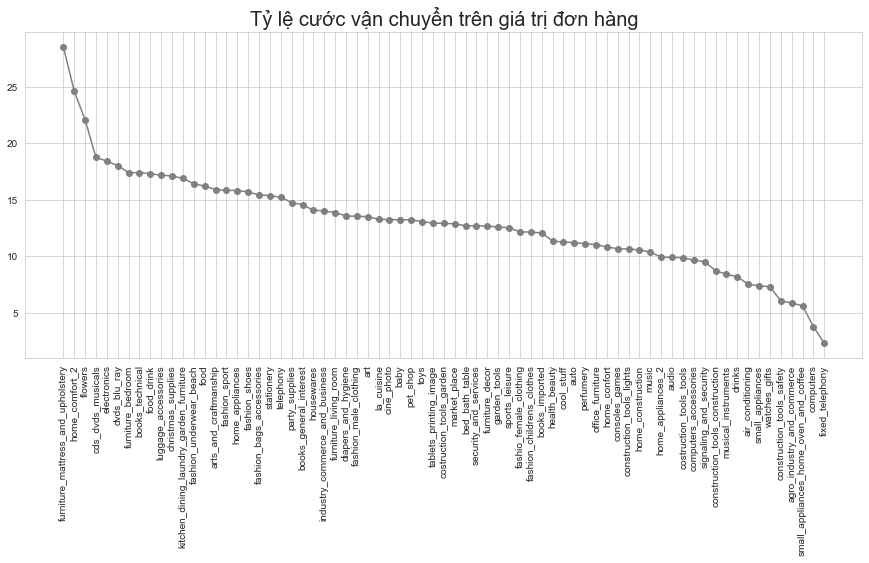

In [824]:
X = freight['product_category_name_english']
Y = freight['freight_value_rate']

plt.figure(figsize=(15,6))

plt.plot(X,Y,color='grey', label = 'freight_value_rate', marker='o')
plt.title(label = "Tỷ lệ cước vận chuyển trên giá trị đơn hàng", fontsize=20)
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10)
plt.show()


In [839]:
%sql select ord.order_purchase_year, ord.order_purchase_month, 100*sum(ord_item.freight_value)/sum(payment.payment_value) as freight_value_rate from olist_orders_dataset_new as ord inner join olist_order_items_dataset as ord_item on ord.order_id = ord_item.order_id inner join olist_order_payments_dataset as payment on payment.order_id = ord.order_id group by ord.order_purchase_year, ord.order_purchase_month order by freight_value_rate desc

 * sqlite:///brazilian_ecommerce.db
Done.


order_purchase_year,order_purchase_month,freight_value_rate
2016,12,44.44444444444445
2016,9,22.70372928176796
2018,9,12.89198606271777
2018,6,12.757062429989313
2017,7,12.708103811309277
2018,7,12.577702770634884
2018,8,12.494158877174632
2017,6,12.22873077328385
2018,3,12.104031312823254
2017,2,12.052402490314831


 * sqlite:///brazilian_ecommerce.db
Done.


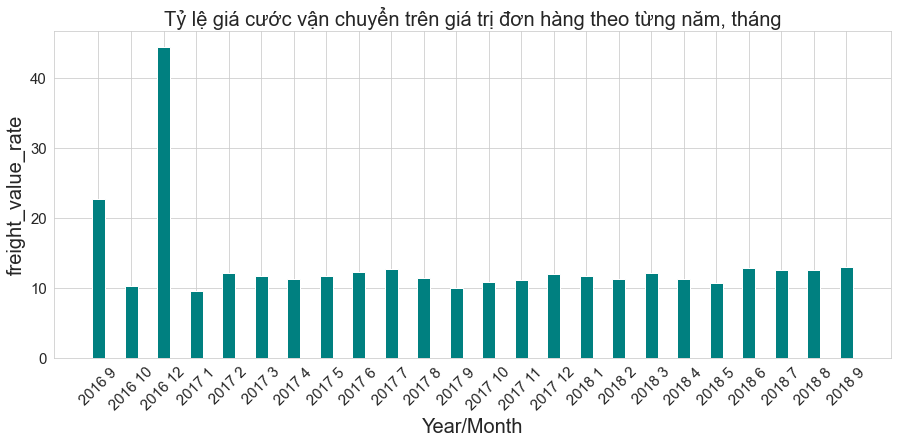

In [841]:
#vẽ biểu đồ hiển thị top10 ngành hàng có giá trị đơn hàng trung bình cao nhất
freight_draw = %sql select ord.order_purchase_year, ord.order_purchase_month, 100*sum(ord_item.freight_value)/sum(payment.payment_value) as freight_value_rate from olist_orders_dataset_new as ord inner join olist_order_items_dataset as ord_item on ord.order_id = ord_item.order_id inner join olist_order_payments_dataset as payment on payment.order_id = ord.order_id group by ord.order_purchase_year, ord.order_purchase_month

plt.figure(figsize=(15,6))
freight_draw.bar(width=0.4, color = 'teal')
plt.title(label = 'Tỷ lệ giá cước vận chuyển trên giá trị đơn hàng theo từng năm, tháng', fontsize=20)
plt.xlabel('Year/Month', fontsize=20)
plt.ylabel('freight_value_rate', fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

**Nhận xét**: 
- Giá cước vận chuyển phụ thuộc yếu tố khoảng cách là chủ yếu. Do vậy, việc so sánh tỷ lệ giá cước vận chuyển trên giá trị đơn hàng chỉ mảng tính tương đối. 
- Tỷ lệ giá cước vận chuyển trên giá trị đơn hàng có thể được sử dụng để đánh giá mức độ hiệu quả thực hiện đơn hàng, ngoài ra nó cũng là yếu tố để khách hàng xem xét ra quyết định khi đặt hàng. vì nếu tỷ lệ giá cước trên đơn hàng quá cao, khách rất có thể không mua hàng nữa. 
- Tỷ lệ này giảm cho thấy khả năng phát triển và tối ưu chi phí của hệ thống logistics xử lý đơn hàng 

### <a id='processing'>6. Processing</a> 

In [559]:
print('Số ngày trung bình để xử lý 1 đơn hàng: ', olist_orders_dataset['processing_days'].mean())

Số ngày trung bình để xử lý 1 đơn hàng:  12 days 13:24:31.879068369
